<a href="https://colab.research.google.com/github/Skylake143/MachineLearning/blob/main/Demos/Demo2_outline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demo 2: Overfitting and Underfitting in Binary Classification

In [1]:
# Imports
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets, ensemble, metrics, svm, model_selection, linear_model, inspection
import matplotlib.pyplot as plt
#import autosklearn.classification  # this may give an error; running this cell a few times will cause this to go away
#from autosklearn.classification import AutoSklearnClassifier

For this demonstration we will be using a heart disease dataset, which classifies whether a person has a heart disease (label 1) or not (label 0)  based on 13 features. The various features for a number of instances are shown below, where we prepare the data for use. The original dataset and more information can be found [here](https://github.com/kb22/Heart-Disease-Prediction/blob/master/dataset.csv) in the original github repository.

In [2]:
url = 'https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv'
data = pd.read_csv(url)
X = data.iloc[:,0:13]  # separating features and labels
y = data.iloc[:,[-1]]
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Underfitting

We first split the data into a training set and a test set using the in-built ```train_test_split``` of the sklearn package. The training set it used to train the model, whereas the test set is used to evaluate how well the model performs. Here, the training set is then once more split the same way into the final training set and validation set. The validation set is used to evaluate the training accuracy of the model, although its prime function (hyperparameter tuning) will be discussed later. In actuality, one typically sets the train-test split to be around 70-30, however the training set will be chosen to be small to illustrate the following concepts of underfitting and overfitting.

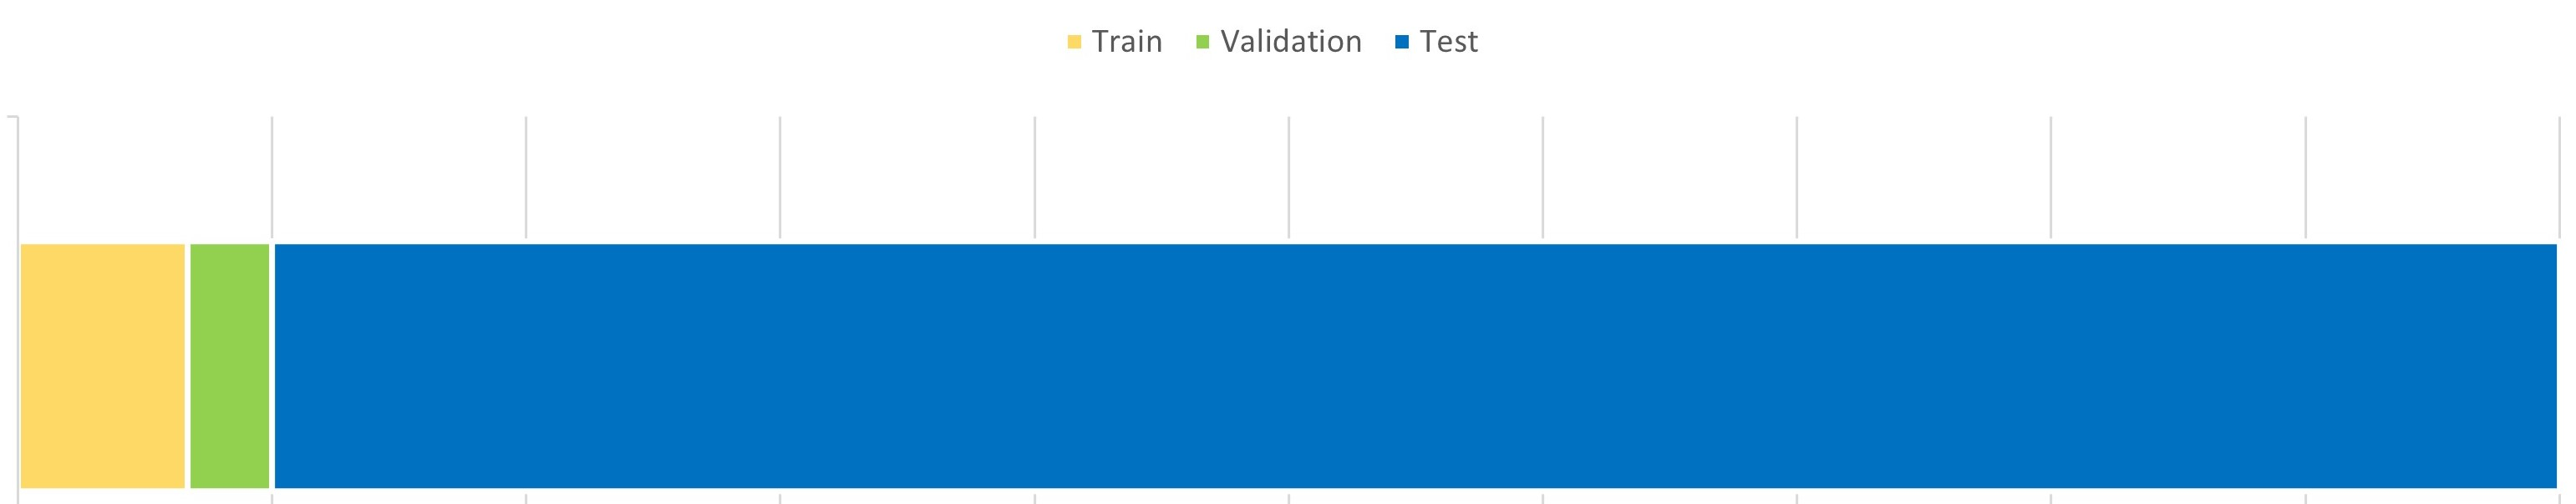

In [3]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.9, random_state=0) # seed for reproducability
# We use train_test_split to split into a trainingset and validation set
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_train, y_train, test_size=0.33, random_state=0)

Now that a split has been made, we use a Support Vector Machine (SVM) model to perform the fit and assess the performance.

In [4]:
rfc = sklearn.svm.SVC(random_state=0)
rfc.fit(X_train, np.ravel(y_train))
y_pred = rfc.predict(X_test)
y_pred_train = rfc.predict(X_val)

# Testing the accuracy of the train and test set
print(" ---------------------------- ")
print(f"| Train set accuracy | {sklearn.metrics.accuracy_score(y_val.iloc[:,[0]], y_pred_train)}   |")
print("|----------------------------|")
print(f"| Test set accuracy  |{sklearn.metrics.accuracy_score(y_test.iloc[:,[0]], y_pred): .3f} |")
print(" ---------------------------- ")

 ---------------------------- 
| Train set accuracy | 0.7   |
|----------------------------|
| Test set accuracy  | 0.440 |
 ---------------------------- 


We see here that both the training set accuracy and the test set accuracy are on the low side, meaning that the training set error and the test set error are relatively high. This indicates that the model is underfitting on the dataset. Having a model that is too simple or not suited to the dataset is a likely cause of underfitting. Model selection is an important part in machine learning and thus selecting the best model for the data at hand is crucial. Furthermore, training a model on a small dataset here contributes to this underfitting.

# Overfitting

So say we now decide to change our model to approximate our data better and after some investigation, we settle on a Decision Tree classifier. Using the same train-test split, the model is once again trained and evaluated.

In [5]:
dtc = sklearn.tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, np.ravel(y_train))
ydtc_pred = dtc.predict(X_test)
ydtc_pred_val = dtc.predict(X_val)

# Testing the accuracy of the train and test set
print(" ---------------------------- ")
print(f"| Train set accuracy | {sklearn.metrics.accuracy_score(y_val, ydtc_pred_val)}   |")
print("|----------------------------|")
print(f"| Test set accuracy  |{sklearn.metrics.accuracy_score(y_test, ydtc_pred): .3f} |")
print(" ---------------------------- ")

 ---------------------------- 
| Train set accuracy | 0.8   |
|----------------------------|
| Test set accuracy  | 0.656 |
 ---------------------------- 


We now see with the Decision Tree classifier the train set error is a lot lower than before. The test set error is also slightly lower, but still a lot higher than the training set error. Such a discrepancy between the training set error and the test set error indicates that the model may be overfitting on the data. The term overfitting refers to when the model follow the training data so narrowly that it fails to generalise on unseen data: it has learned the data too well. Decision trees are known to be prone to overfitting, which is enhanced by how small the training set it.

But how do we know for certain that our model is overfitting?

# K-fold Cross validation

Cross-validation is often used to detect whether a model is overfitting by creating a more complete representation of the data. The dataset is divided into a number (k) folds. The algorithm is then trained k times on a dataset where k-1 folds make up the training set, and the remaining fold is used as test set. This is often referred to as K-fold cross validation. Often, the number of folds are taken to be around 5 or 10, however in actuality this may depend on the dataset at hand and should be experimentally or theoretically motivated.

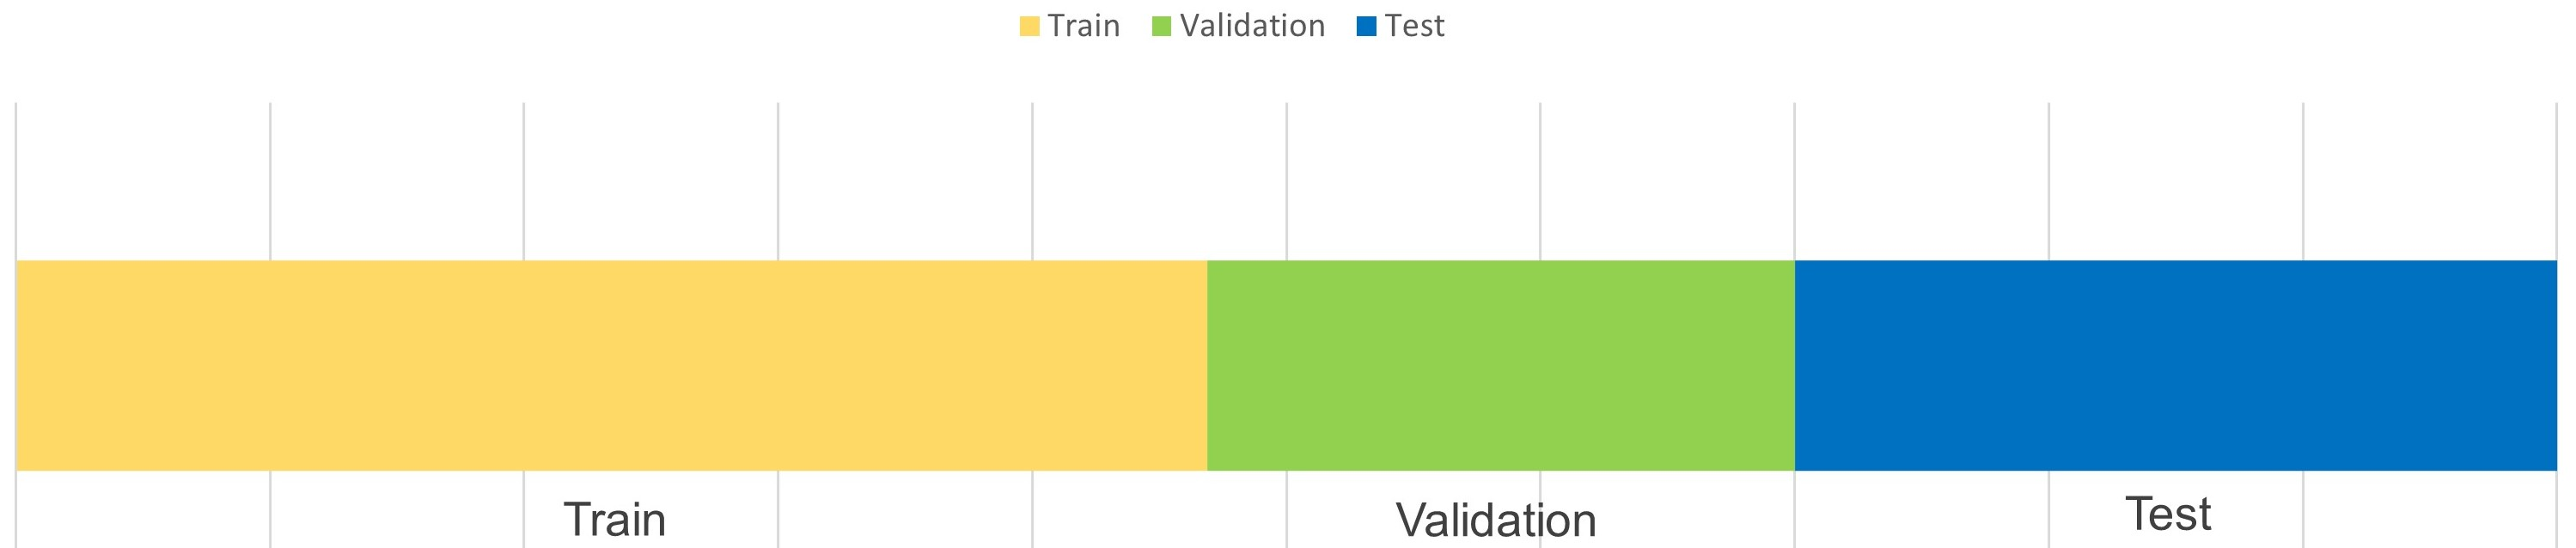

With this in mind, we now are interested in comparing the performance of a train-test split (70-30, indicated in the figure above) to the performance found using 5-fold cross validation. For train-test splits, there exists a possibility that the model is trained on a particular set of data that yields a better or worse fit due to an advantageous or disadvantageous split. By training the model on a different "dataset" every time and averaging the performances, cross-validation gives a more accurate representation of how the model performs.

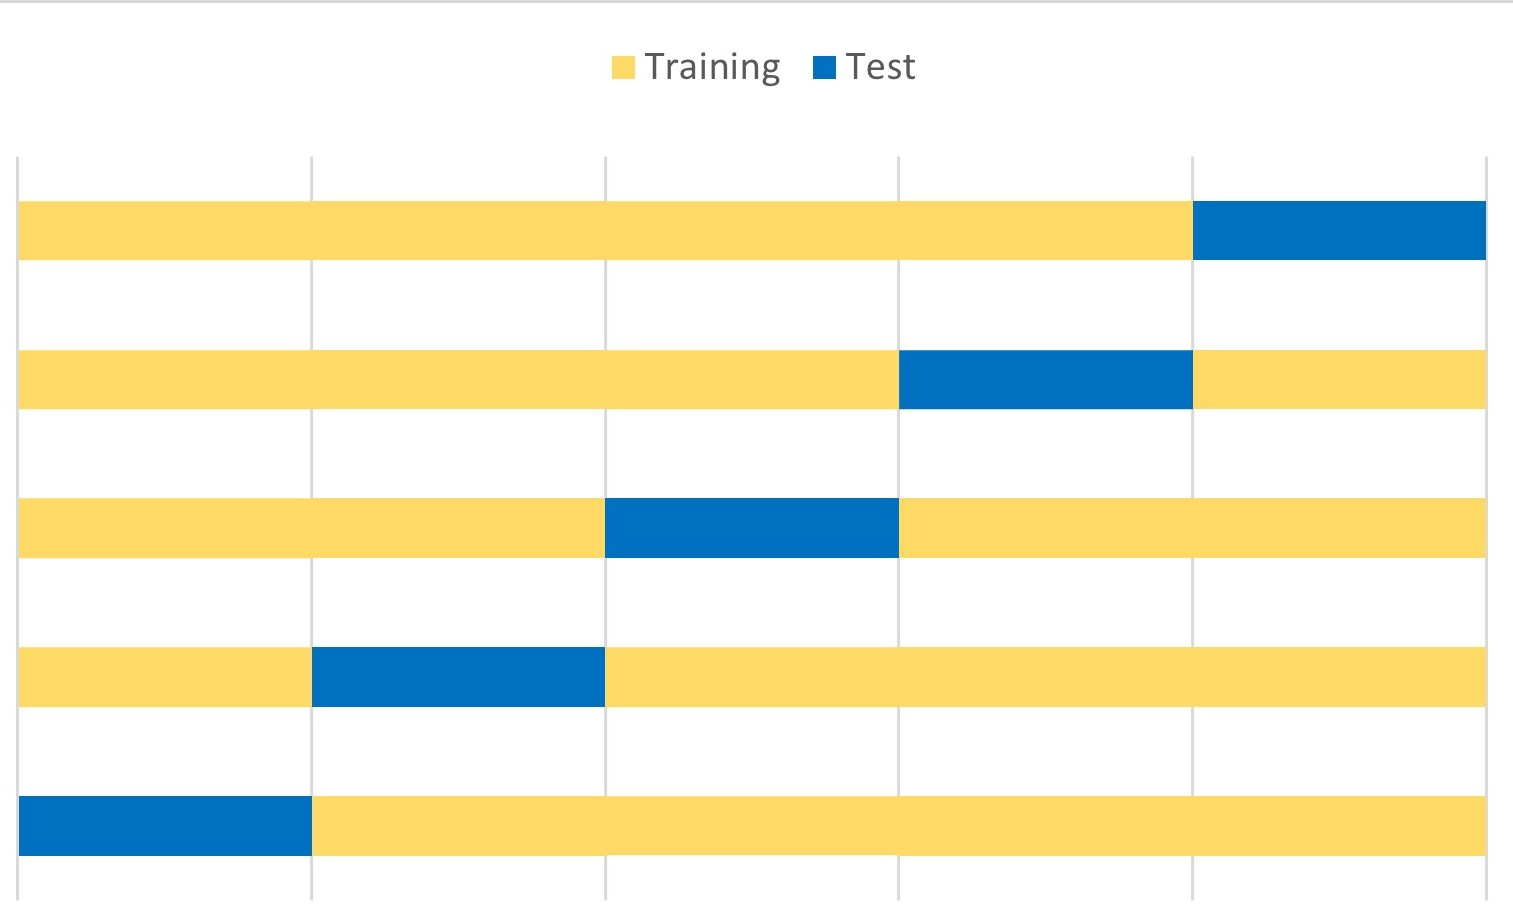

In [6]:
# Train-test split (70-30)
k = 5  # number of folds
X_train_big, X_test_big, y_train_big, y_test_big = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=34)

dtc2 = sklearn.tree.DecisionTreeClassifier(random_state=0)
dtc2.fit(X_train_big, y_train_big)
y_pred_big = dtc2.predict(X_test_big)


# Performing cross-validation (2 way)

kf = model_selection.KFold(n_splits=k)
accuracy_train = np.zeros(k)
accuracy_test = np.zeros(k)
for fold, (train_index, test_index) in enumerate(kf.split(X)):

    dtcv = sklearn.tree.DecisionTreeClassifier(random_state=0)
    dtcv.fit(X.iloc[train_index,:], y.iloc[train_index,:])

    y_pred_cv = dtcv.predict(X.iloc[test_index,:])
    accuracy_test[fold] = sklearn.metrics.accuracy_score(y.iloc[test_index,:], y_pred_cv)


print(" ------------------------------------- ")
print("|                  | Test set accuracy |")
print("|--------------------------------------|")
print(f"| Train-test split | {sklearn.metrics.accuracy_score(y_test_big, y_pred_big): .3f}            |")
print("|--------------------------------------|")
print(f"| Cross validation | {np.mean(accuracy_test): .3f}            |")
print(" -------------------------------------- ")

 ------------------------------------- 
|                  | Test set accuracy |
|--------------------------------------|
| Train-test split |  0.802            |
|--------------------------------------|
| Cross validation |  0.677            |
 -------------------------------------- 


Based on the cross-validation results, the model appears to still be slightly overfitting, contrary to what the train-test split results indicate. Due to having made a particularly advantageous split (captured with random_seed = 34), the model performs better than it does on average as shown by CV.

# Hyperparameter tuning

So how do we improve our model? We have increased the size of the training set, however we have not touched the configuration of our Decision Tree yet. Every algorithm and model is determined by its hyperparameters, which alter various aspects of the model. For Decision Trees, these include the criterion to split on, the maximum depth of the tree (which is particularly important to tune when overfitting) and the minimum number of samples needed to split a node. By tuning the hyperparameters of a model, the model is able to more accurately approximate the particular data at hand and so improve the accuracy. There are various ways to tune the hyperparameters of a model, including manually, with gridsearchcv or randomizedsearchcv, however automated machine learning offers a way to automate this task. Using cross-validation in combination with automated machine learning with the ```autosklearn``` package allows us to further increase the accuracy of our model.

Before, we have used two way k-fold cross-validation, where we perform our fit using a training set and a test set k-times. Since we are interested in tuning the hyperparameters of the model, we use three way k-fold cross-validation. This entails that we have a validation set alongside a training set and test set, which is used to tune the hyperparameters on.

In [7]:
# Hyperparameter optimisation with AutoML, using built-in 3 way cv
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=34)
model = AutoSklearnClassifier(time_left_for_this_task=5*60, per_run_time_limit=30, include={'classifier': ["decision_tree"]}, resampling_strategy="cv",
                              resampling_strategy_arguments={"folds": 5}, initial_configurations_via_metalearning=0)
model.fit(X_train_big, np.ravel(y_train_big))
y_perform = model.predict(X_test_big)
accuracy = sklearn.metrics.accuracy_score(y_test_big, y_perform)
print("CV (hyperparameter tuning)")
print(f"Accuracy: {accuracy}")
# refitting
model.refit(X_train.copy(), y_train.copy())
y_refit = model.predict(X_test)
print(f"Accuracy score (refit): {sklearn.metrics.accuracy_score(y_test, y_refit)}")


# Train-validation-test
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_train, y_train, test_size=0.33, random_state=0)
rfc.fit(X_train, np.ravel(y_train))
y_pred = rfc.predict(X_test)
y_pred_train = rfc.predict(X_val)
print("Train-test split")
print(f" Train: {np.mean(sklearn.metrics.accuracy_score(y_val, y_pred_train))}")
print(f" Test: {np.mean(sklearn.metrics.accuracy_score(y_test, y_pred))}")

# Cross-validation (3 way)
kf = model_selection.KFold(n_splits=k)
accuracy_train = np.zeros(k)
accuracy_test = np.zeros(k)
for i, (train_index, test_index) in enumerate(kf.split(X)):

    val_index = int(2*len(train_index)/3)
    dtcv = sklearn.tree.DecisionTreeClassifier(random_state=0)
    dtcv.fit(X.iloc[train_index[:val_index],:], y.iloc[train_index[:val_index],:])

    y_pred_cv = dtcv.predict(X.iloc[test_index,:])
    y_pred_train = dtcv.predict(X.iloc[train_index[val_index:]])

    accuracy_train[i] = sklearn.metrics.accuracy_score(y.iloc[train_index[val_index:],:], y_pred_train)
    accuracy_test[i] = sklearn.metrics.accuracy_score(y.iloc[test_index,:], y_pred_cv)
print("CV")
print(f" Train: {np.mean(accuracy_train)}")
print(f" Test: {np.mean(accuracy_test)}")

NameError: name 'AutoSklearnClassifier' is not defined

In [ ]:
# plotting the accuracies alongside each other

accuracies = [np.mean(sklearn.metrics.accuracy_score(y_test, y_pred)), np.mean(accuracy_test), sklearn.metrics.accuracy_score(y_test, y_refit)]
labels = ['Train-validation set', 'Three way CV', 'Three way CV, \nhyperparameter tuning']
colours = ['tab:orange', 'tab:green', 'tab:blue']

fix, ax = plt.subplots()
ax.bar(labels, accuracies, color=colours)
ax.set_ylabel('Mean accuracy')
plt.show()

# Conclusions

As we can see, 3 way cross-validation in combination with hyperparameter tuning gives the best result when it comes to the accuracy of the model. Do note that we have only run the hyperparameter tuning for 5 minutes; if we would run the fitting process for longer (around an hour), the model and subsequently the accuracy would be even better. Preventing a model from overfitting or underfitting by using methods such at cross validation will ensure your model will work well with unseen data. Increasing the size of the training set, taking care in selecting a model and tuning hyperparameters here are crucial steps in machine learning and require careful consideration when working on your own models in the future.